# setup #

In [82]:
import sys
#sys.path.append('../../drormd') # If you install drormd locally or run on sherlock, you won't need this.
from drormd import plot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys
import os
import importlib
from scipy.stats import pearsonr
# Correctly expand the path to your Desktop/dror directory
script_dir = os.path.expanduser("~/Desktop/dror")
sys.path.append(script_dir)

# Now try to import
import useful
importlib.reload(useful)

<module 'useful' from '/Users/evefine/Desktop/dror/useful.py'>

In [83]:
conditions = ['Gs', 'arr_v1']
colors = {'Gs': '#60b75d', 'arr_v1': '#835d5d', 'Gq': '#60b75d','Gi': '#60b75d',
         'arr': '#835d5d'}

data = {}
receps = ['B1AR', '5HT2B', 'CB1', 'KOR']

folders = {'B1AR':'results_2', 
           '5HT2B':'results',
           'CB1':'results_2',
          'KOR' :'results',}

conditions = {'B1AR':['Gs', 'arr_v1'],
              '5HT2B':['Gq', 'arr'],
              'CB1':['Gi', 'arr_v1'],
             'KOR': ['Gi', 'arr'],}

reps = {'B1AR':6,
        '5HT2B': 12,
        'CB1': 6,
       'KOR': 12}

for recep in receps:
    data[recep] = plot.load(f'{recep}/{folders[recep]}/', conditions[recep])

print(data['B1AR']['Gs']['Gs_r1'].keys())



Index(['7.53-chi1', '3.50-chi2', '7.53-1.53', '7.56N-7.52O', '8.49-12.48',
       'TM7 twist 1', 'TM7 twist mult', 'TM6-TM3', 'TM6-TM7', 'TM7-TM2',
       'H8-TM3'],
      dtype='object')


In [84]:
help(useful.plot_time_traces)

Help on function plot_time_traces in module useful:

plot_time_traces(conditions, data, colors=['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02'], leg_title='')
    Plots smoothed time traces and kernel density estimates (KDEs) for a given metric across multiple conditions.
    
    Parameters:
        conditions (list of str): List of condition names (e.g., ['WT', 'mutantA']) corresponding to keys in `data`.
        data (dict): Nested dictionary organized as data[condition][replicate][metric] = time series array.
        colors (list of str): List of colors to use for each condition. Defaults to a predefined color palette.
        leg_title (str): Title for the legend box.
    
    Returns:
        None. Generates matplotlib plots for each metric across the specified conditions.
    
    Behavior:
        - For each metric in the first replicate of the first condition, the function:
            - Gathers all corresponding metric traces across replicates and conditions

In [86]:
for recep in receps:
    pass
    #useful.plot_time_traces(conditions[recep], data[recep], leg_title = recep)

# functions #

In [14]:
def get_measurements(measurements_dict, metric, filt_cond=False, start=200, finish=3000):
    if filt_cond:
        metric_name = metric + ' filt ' + filt_cond[0]
    else:
        metric_name = metric
    for recep in receps:
        measurements_dict[recep][metric_name] = {}
        for cond in conditions[recep]:
            measurements_dict[recep][metric_name][cond] = useful.make_lists(data[recep],cond,reps[recep],start=start,finish=finish,skip=False,met=metric,filt=filt_cond)
            
def plot_measurements(measurements_dict, metric, receps, metric2=False,
                      colors=['#084594', '#6baed6', '#d94801', '#fdae6b','#525252', '#bdbdbd', '#005a32', '#74c476'],
                     xlabel = 'Value',xlim=None):
    labels = []
    data_metric = []
    
    for recep in receps:
        for cond in conditions[recep]:
            data_metric.append(measurements[recep][metric][cond])
            labels.append(recep + ' ' + cond)    
            if metric2:
                ind = metric2.find('filt')
                data_metric.append(measurements[recep][metric2][cond])
                labels.append(recep + ' ' + cond + ' ' + metric2[ind:])
    useful.plot_smooth_frequency(data_metric, labels=labels,colors=colors,title=metric,xaxis=xlabel, xlim=xlim)
    
import matplotlib.pyplot as plt

def scatter_plot(x, y, xlabel='X', ylabel='Y', title='Scatter Plot', color='blue', size=50,
                xlim=False,ylim=False):
    """
    Create a scatter plot from two lists.

    Parameters:
        x (list): x-axis values.
        y (list): y-axis values.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the plot.
        color (str): Color of the points.
        size (int): Size of the points.
    """
    if len(x) != len(y):
        raise ValueError("x and y must be the same length.")

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c=color, s=size, alpha=0.7, edgecolors='k')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    
def compare_correlation(list1, list2):
    """
    Computes and returns the Pearson correlation coefficient and p-value 
    between two numeric lists.

    Parameters:
    - list1: list or array-like of numerical values
    - list2: list or array-like of numerical values

    Returns:
    - correlation: Pearson correlation coefficient
    - p_value: two-tailed p-value
    """
    if len(list1) != len(list2):
        raise ValueError("Lists must be the same length.")
    
    correlation, p_value = pearsonr(list1, list2)
    return correlation, p_value

In [21]:
def add_mets(mets, met_name, measurements_dict):
    for recep in receps:
        measurements_dict[recep][met_name] = {}
        for cond in conditions[recep]:
            combined = np.zeros(len(measurements_dict[recep][mets[0]][cond]))
            for met in mets:
                combined += np.array(measurements_dict[recep][met][cond])
            measurements_dict[recep][met_name][cond] = combined

In [243]:
string = 'hello'
string.find('hel')

0

# get measurements #

In [19]:
measurements = {}

for recep in receps:
    measurements[recep] = {}

In [39]:
filt_cond = ['7.56N-7.52O', '<', 4]
metrics = ['7.56N-7.52O', 'TM7 twist mult', 'TM7-TM2', 'TM6-TM3', 'H8-TM3', '3.50-chi2','TM6-TM7',
          'TM7 twist 1', '7.53-1.53', '7.53-chi1']

for metric in metrics:
    get_measurements(measurements, metric, filt_cond=filt_cond)
    get_measurements(measurements, metric)

add_mets(['TM7-TM2', 'TM6-TM3', 'TM6-TM7'], 'intracell', measurements)

# scatter plots #

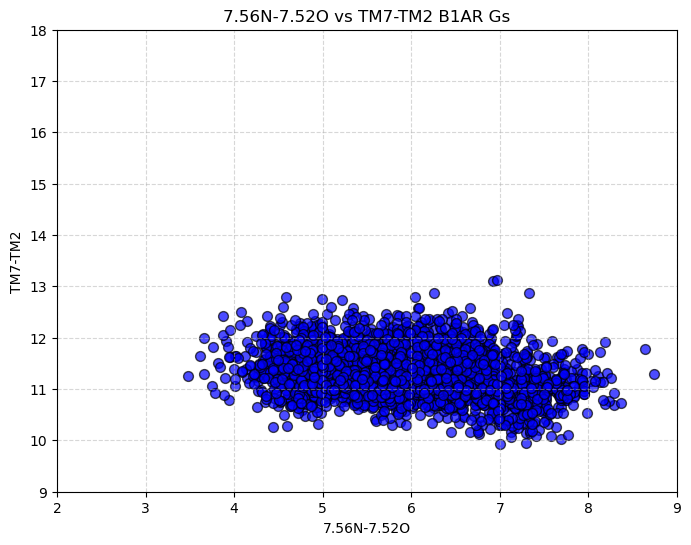

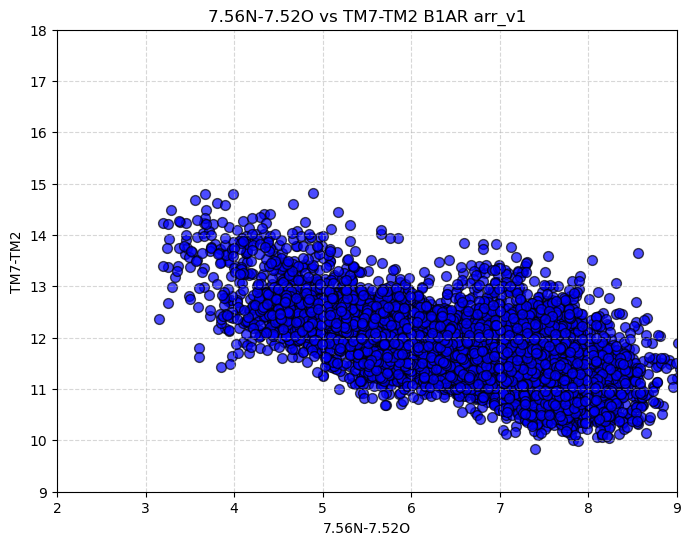

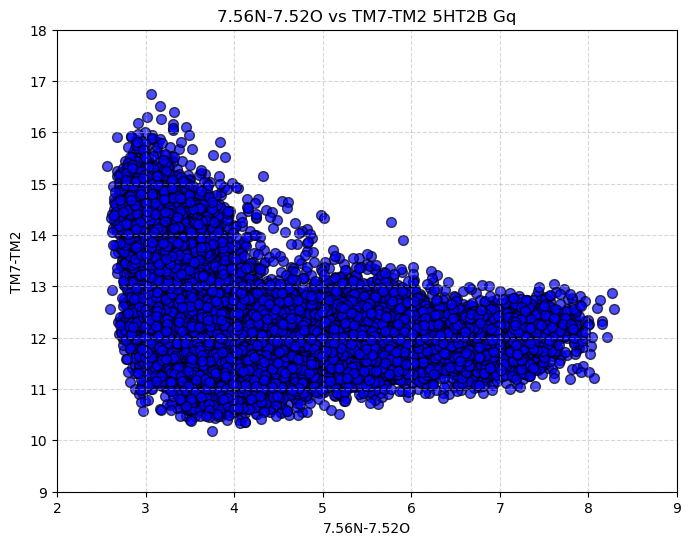

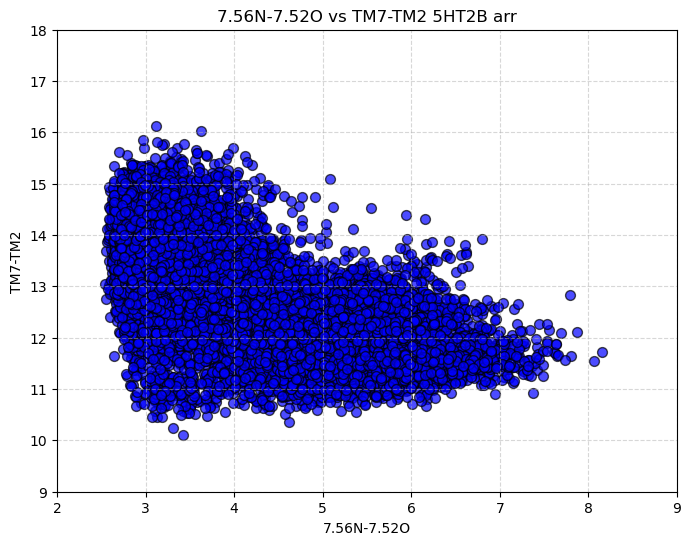

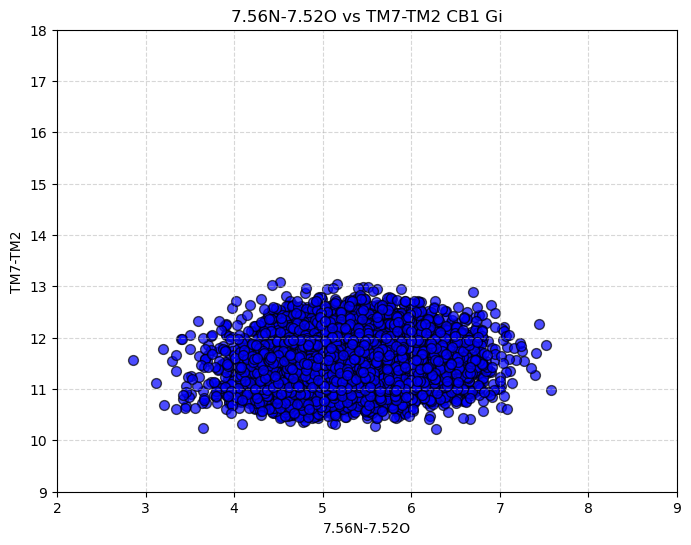

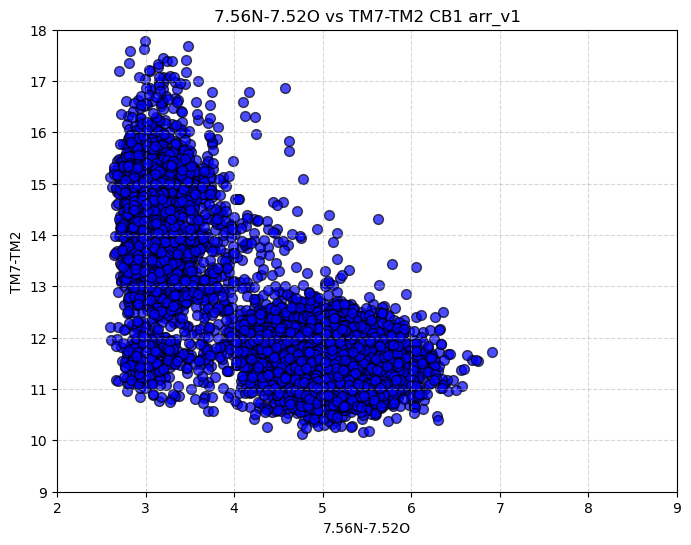

In [209]:
met1 = '7.56N-7.52O'
met2 = 'TM7-TM2'

for recep in receps:
    for cond in conditions[recep]:
        scatter_plot(measurements[recep][met1][cond],measurements[recep][met2][cond],
                     title=f'{met1} vs {met2} {recep} {cond}',xlabel=met1, ylabel=met2,
                    xlim=[2,9], ylim=[9,18])

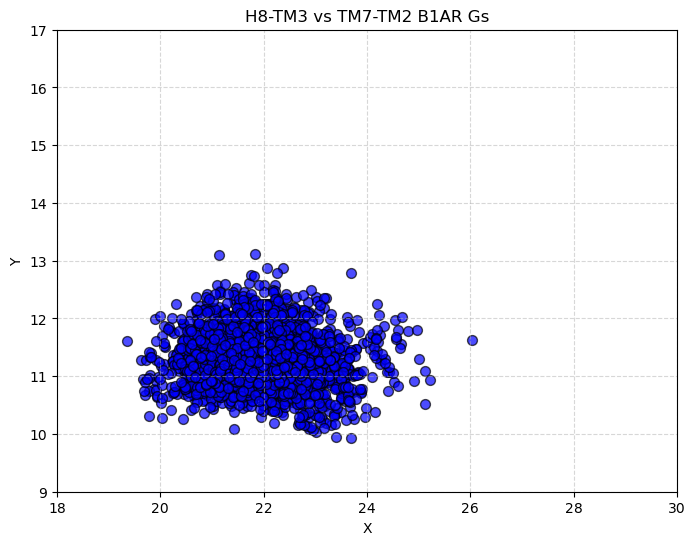

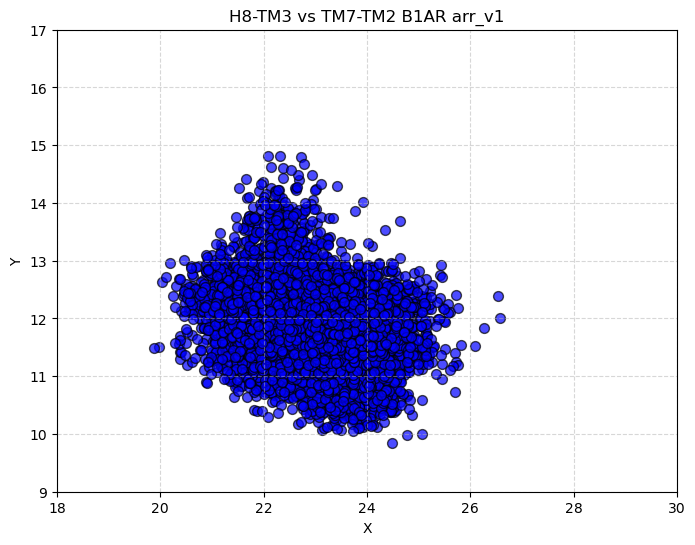

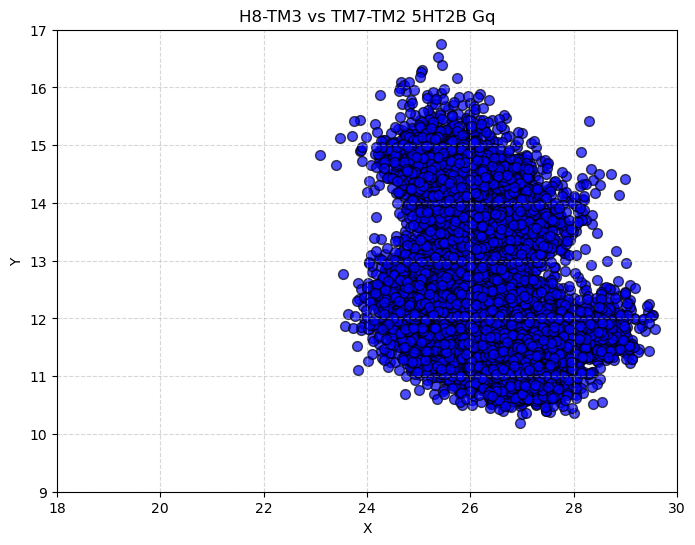

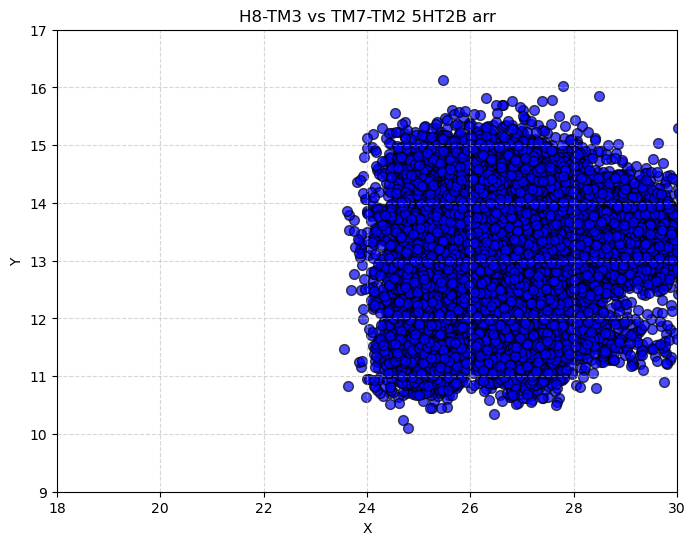

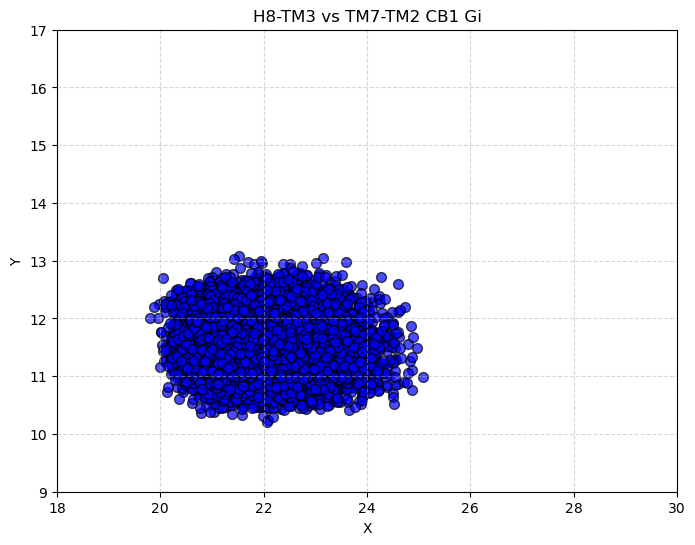

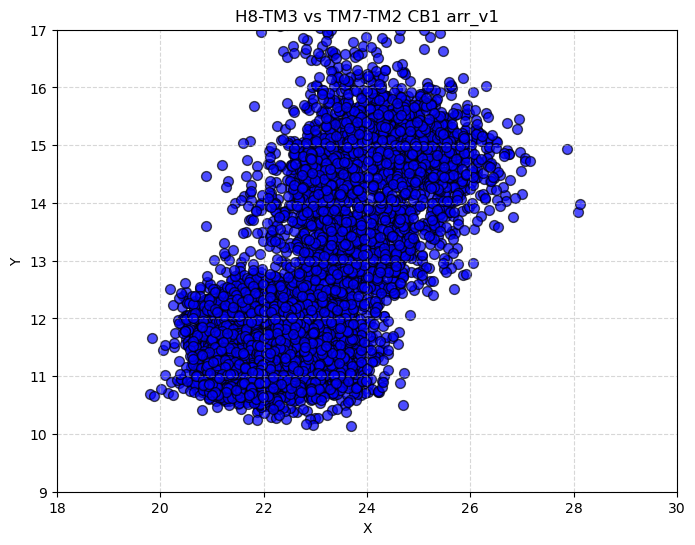

In [181]:
met1 = 'H8-TM3'
met2 = 'TM7-TM2'

for recep in receps:
    for cond in conditions[recep]:
        scatter_plot(measurements[recep][met1][cond],measurements[recep][met2][cond],
                     title=f'{met1} vs {met2} {recep} {cond}',
                    xlim=[18,30], ylim=[9,17])

# frequency plots #

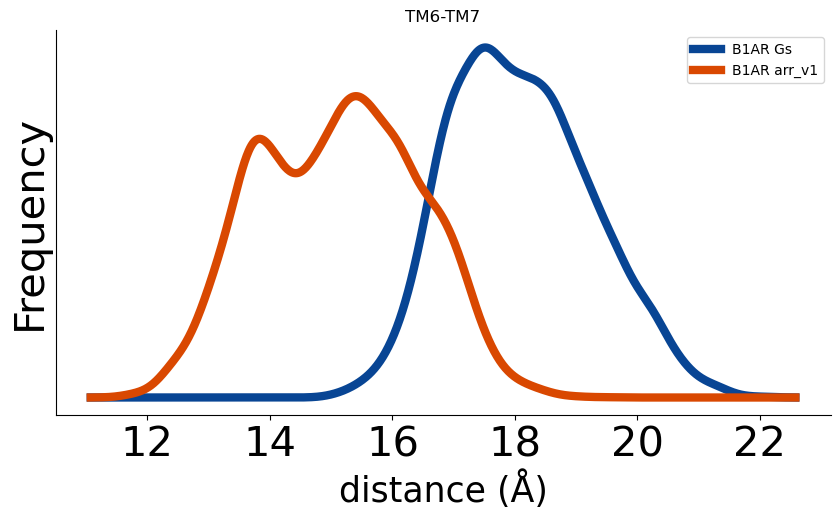

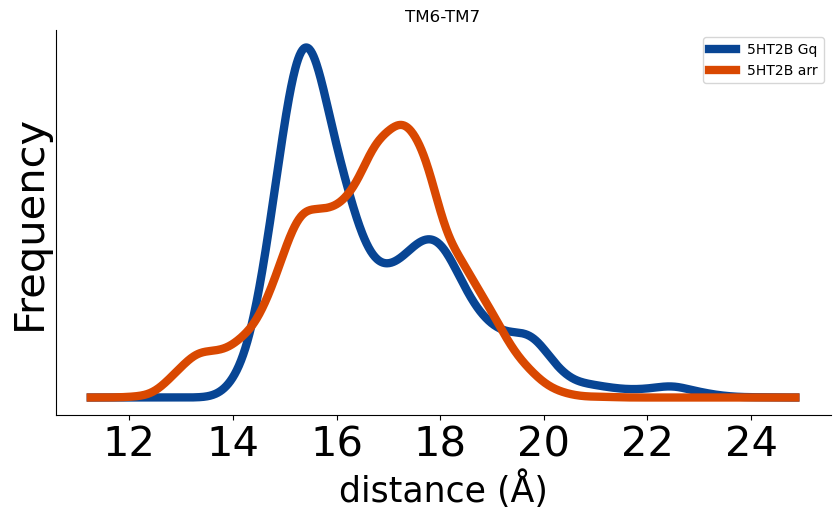

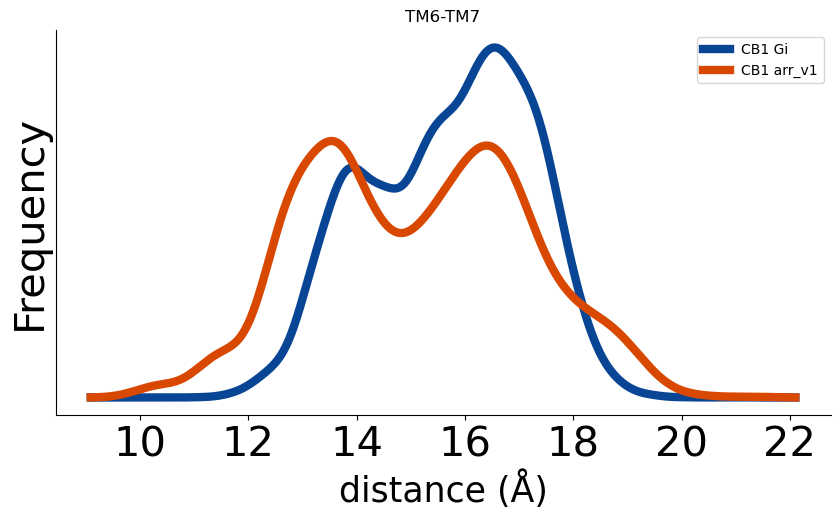

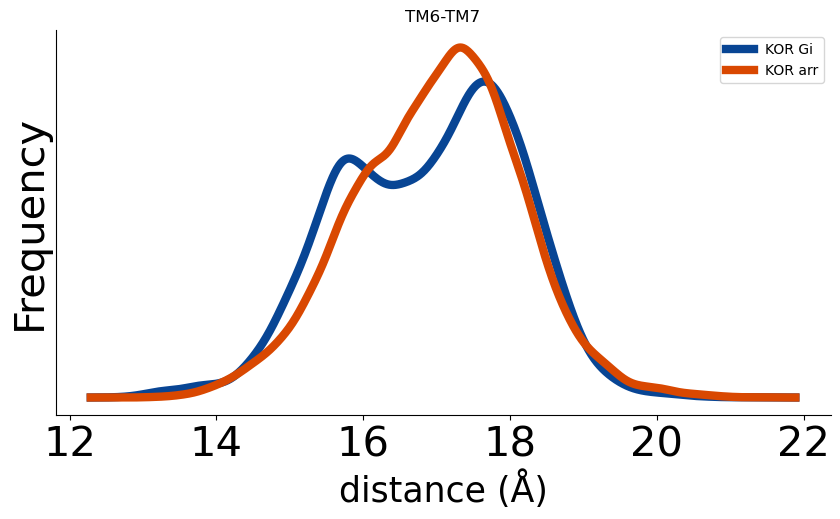

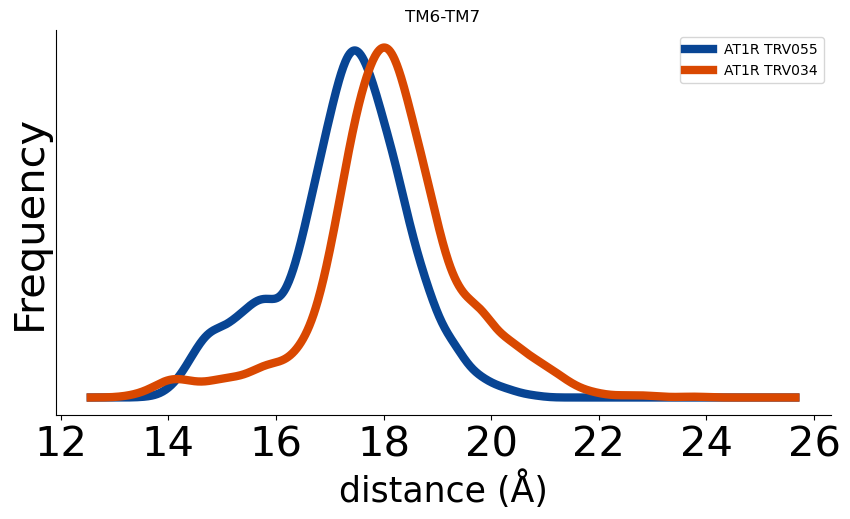

In [297]:
metric_lst = ['TM6-TM7']

for metric in metric_lst:
    for recep in receps:
        pass
        plot_measurements(measurements, metric, [recep],xlabel='distance (Å)', colors = ['#084594', '#d94801'])

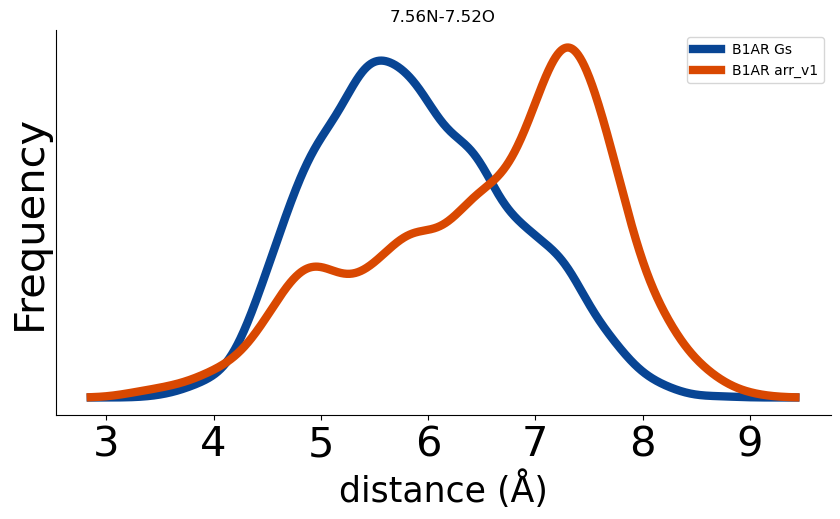

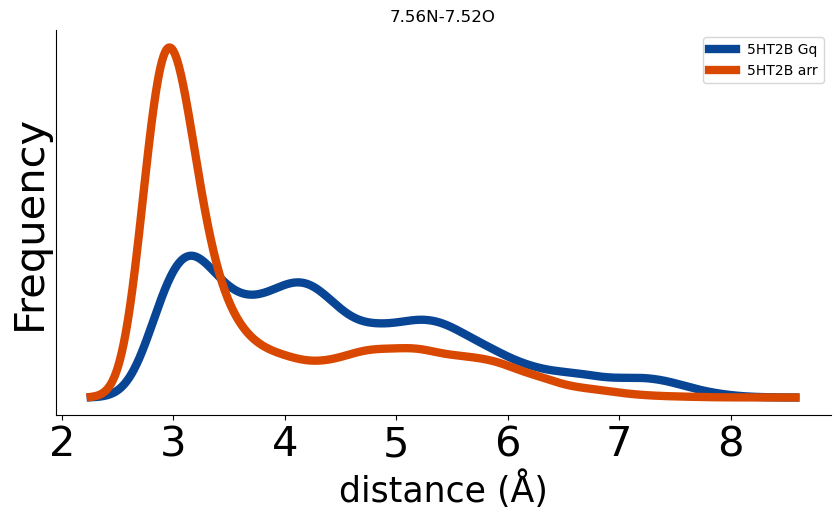

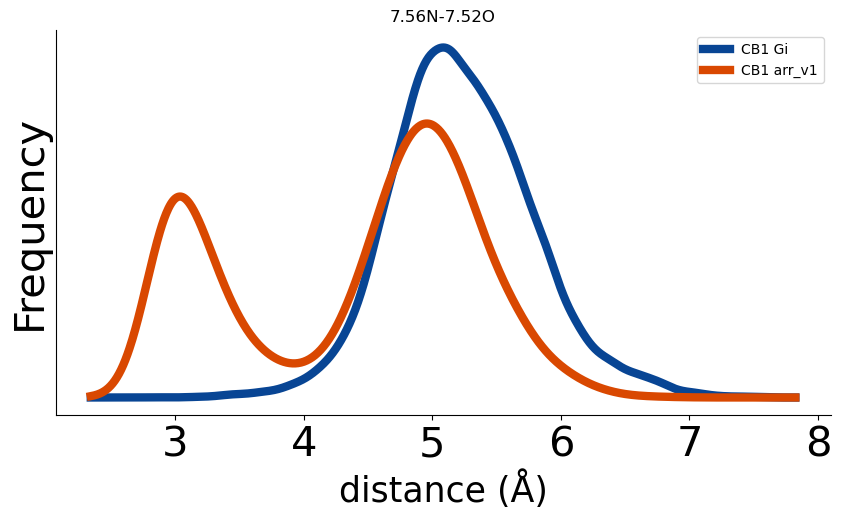

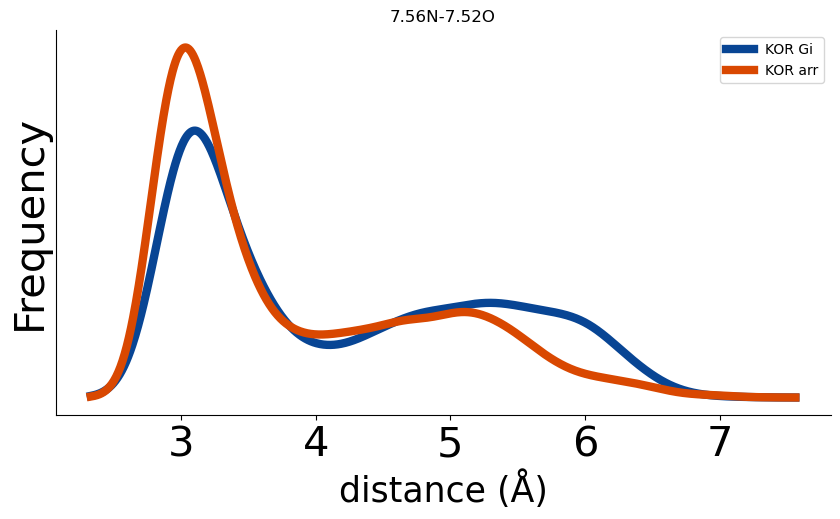

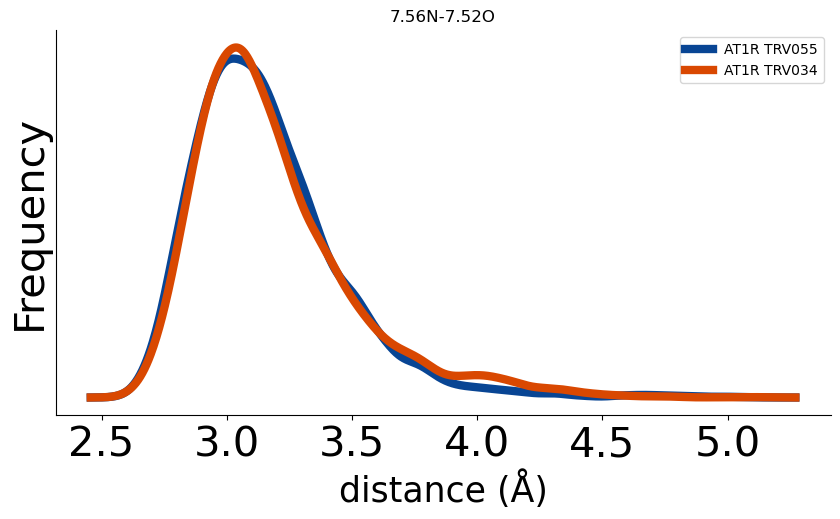

In [271]:
metric_lst = ['7.56N-7.52O']

for metric in metric_lst:
    for recep in receps:
        pass
        plot_measurements(measurements, metric, [recep],xlabel='distance (Å)', colors = ['#084594', '#d94801'])

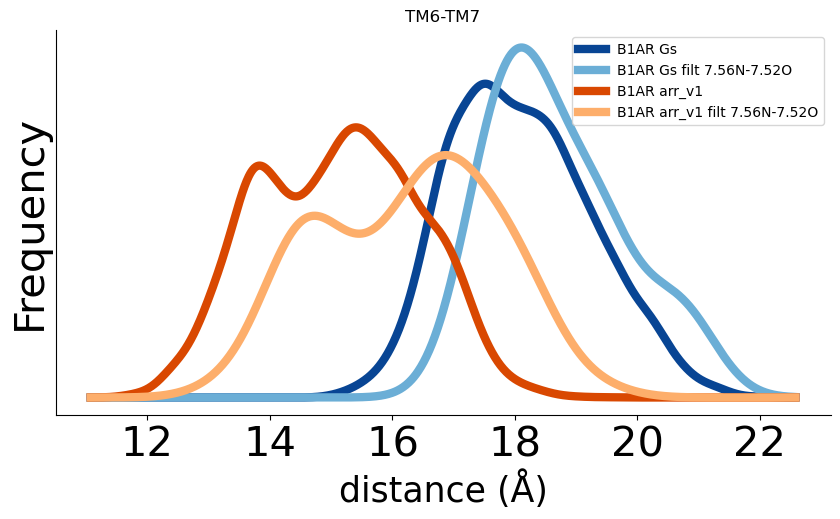

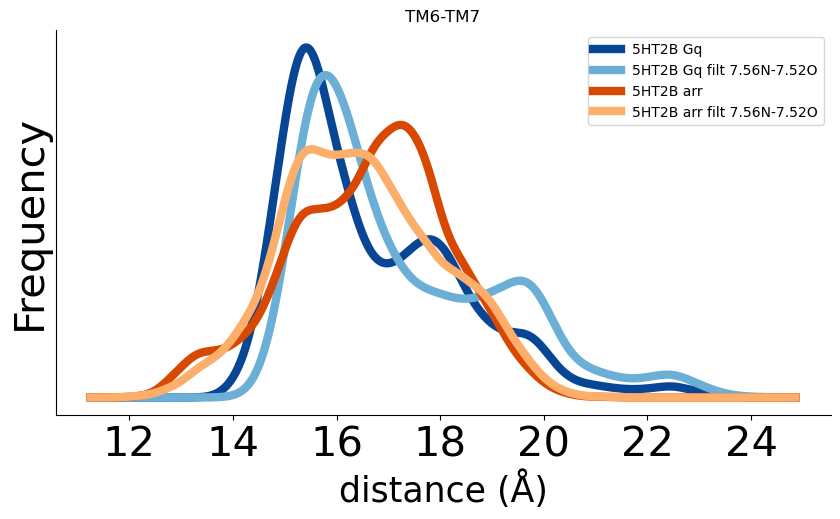

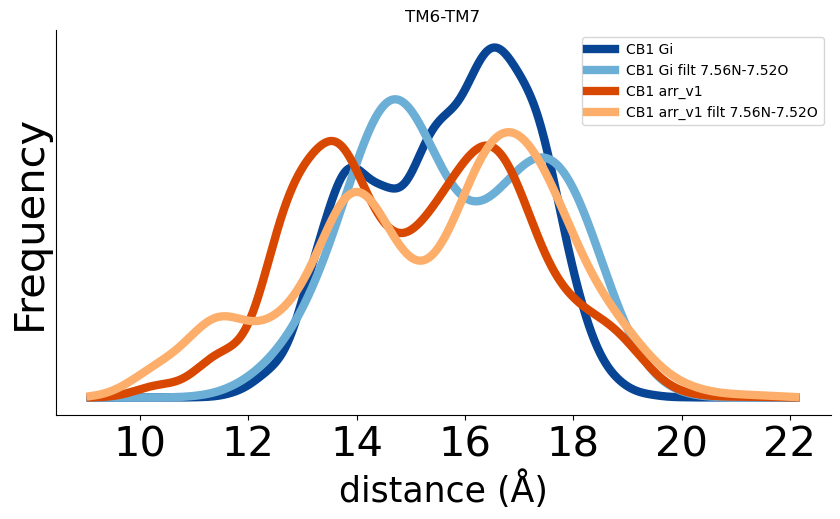

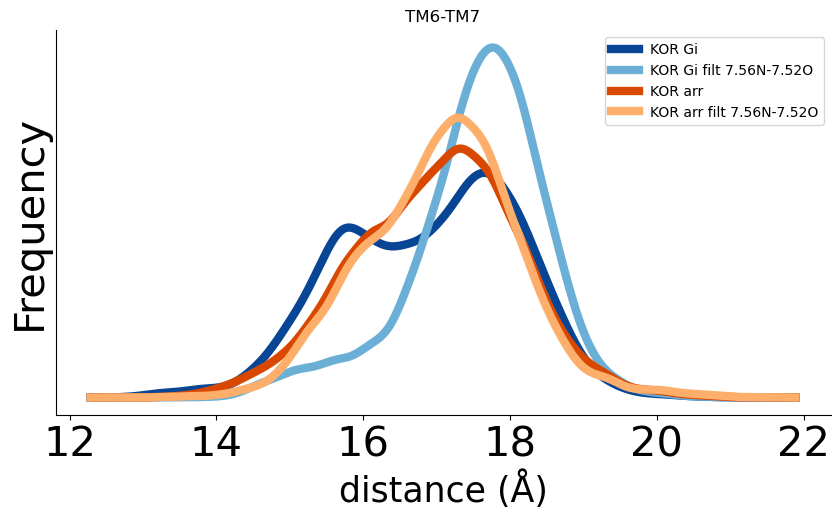

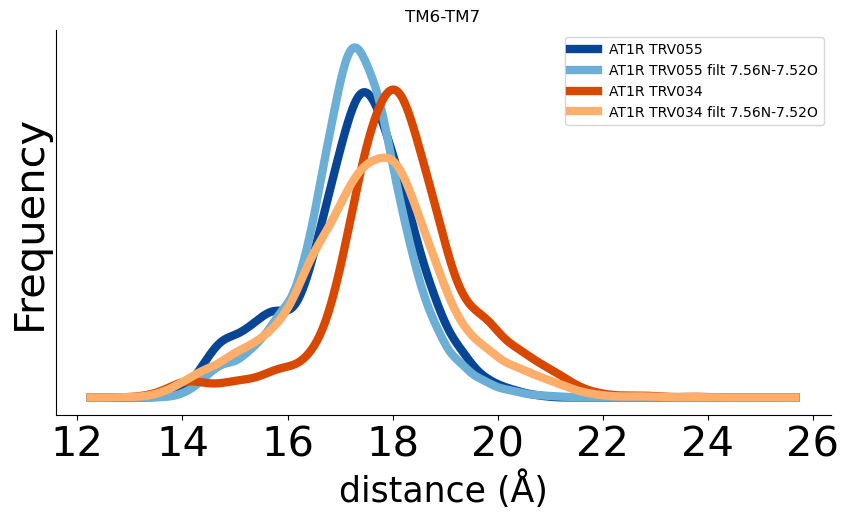

In [276]:
metric_lst = ['TM6-TM7']

for metric in metric_lst:
    for recep in receps:
        pass
        plot_measurements(measurements, metric, [recep], metric2=metric + ' filt ' + filt_cond[0],xlabel='distance (Å)')

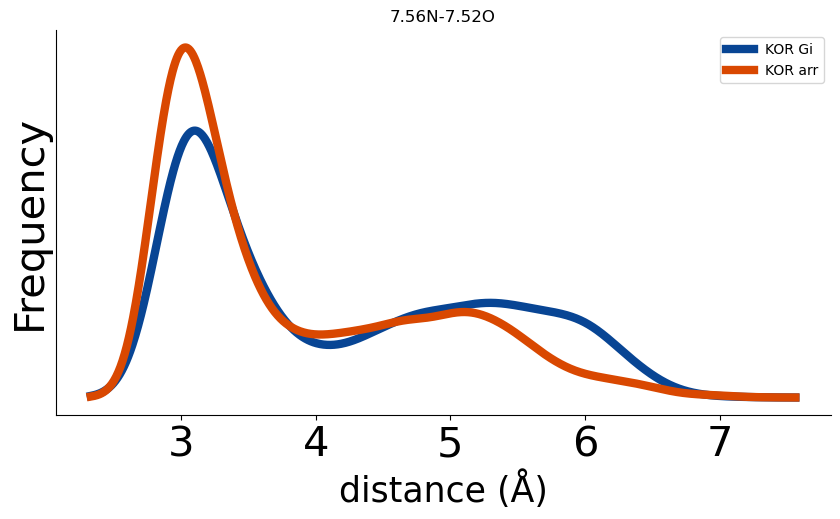

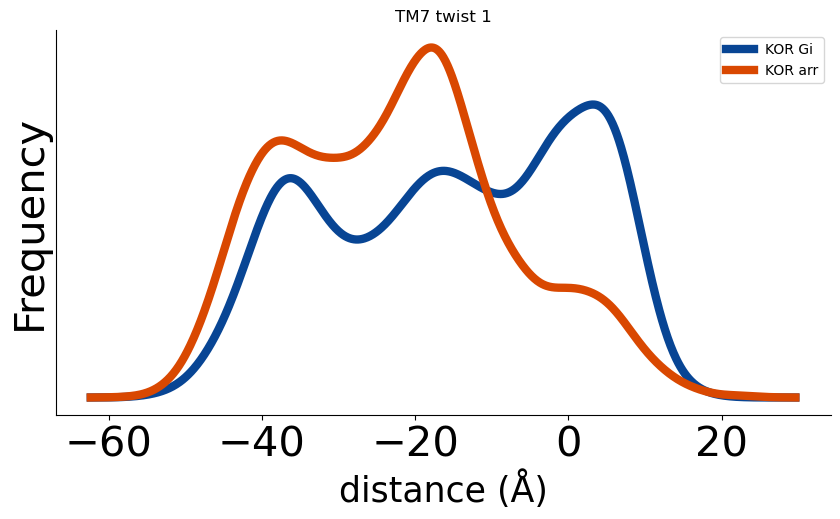

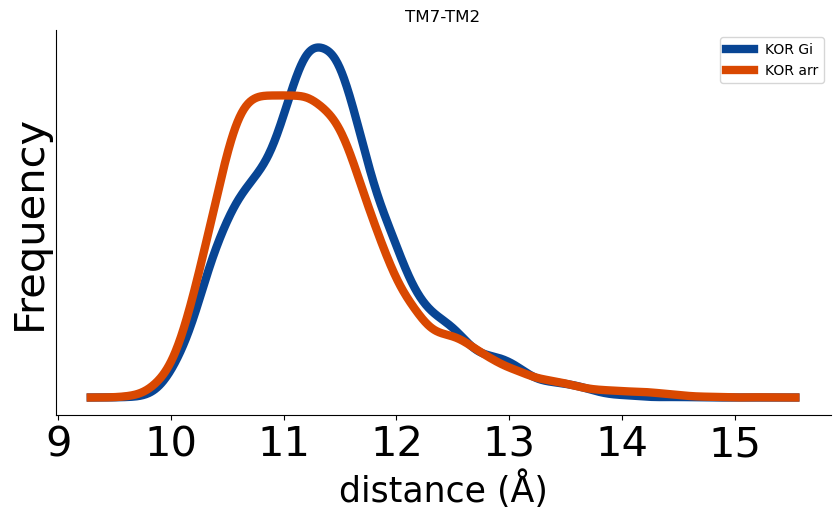

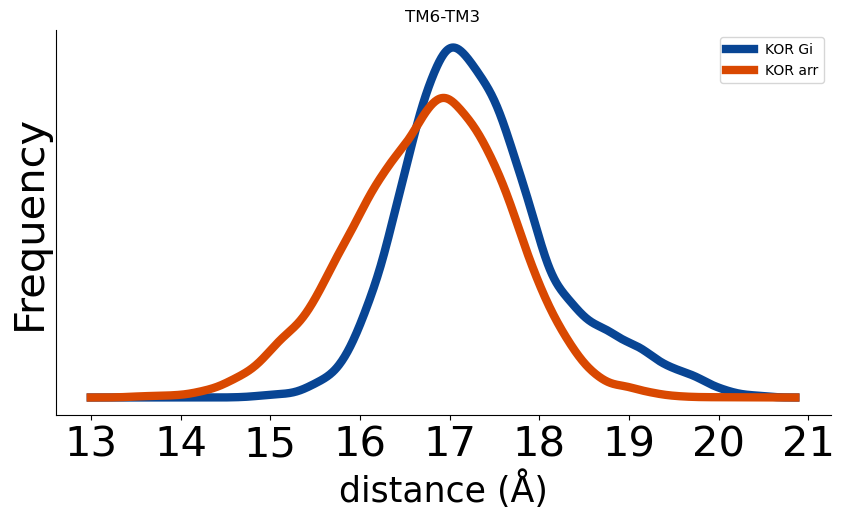

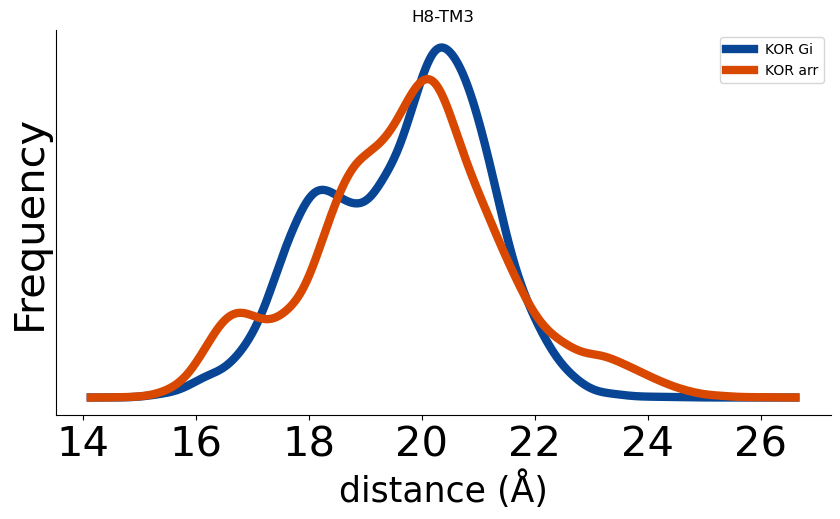

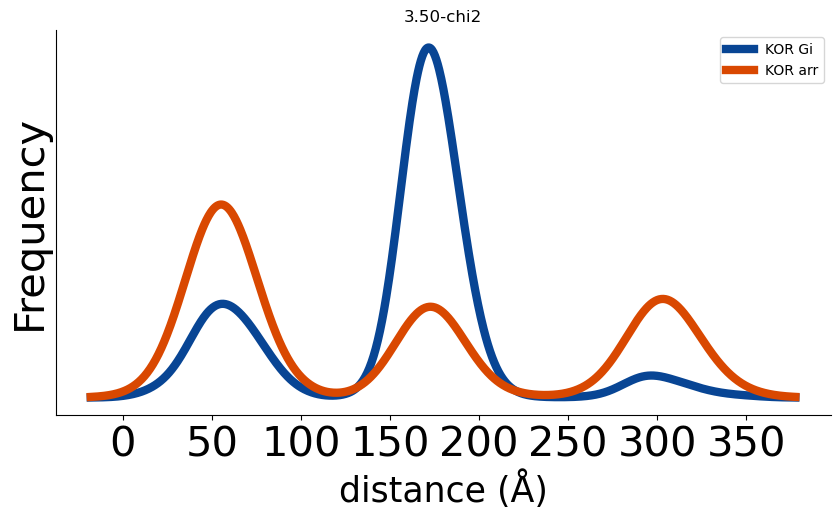

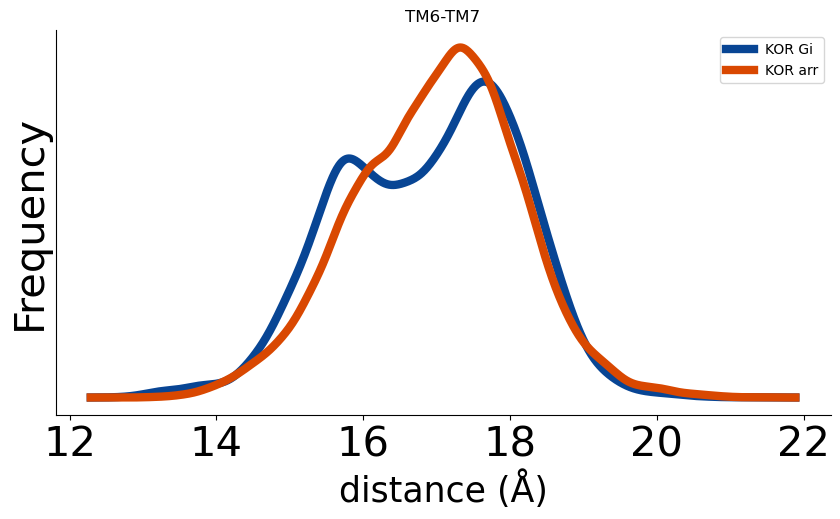

In [274]:
metric_l = 'TM6-TM3'

for metric in metrics:
    plot_measurements(measurements, metric, ['KOR'], xlabel='distance (Å)',colors=['#084594', '#d94801'])

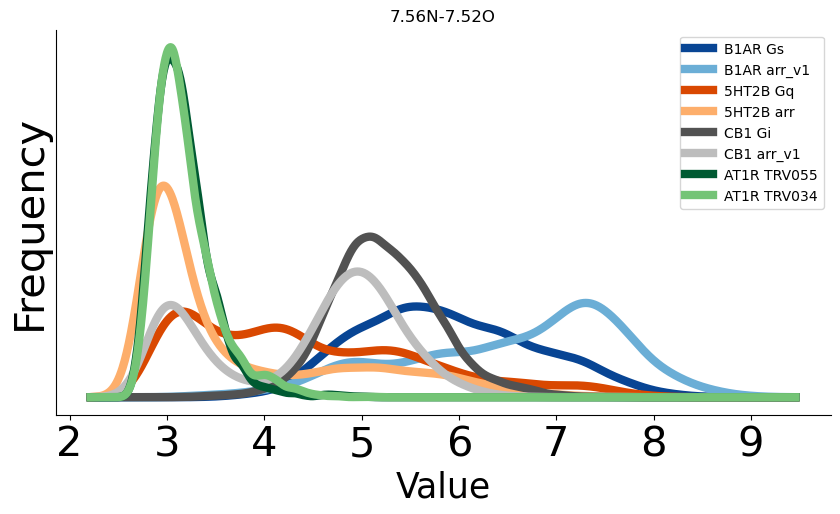

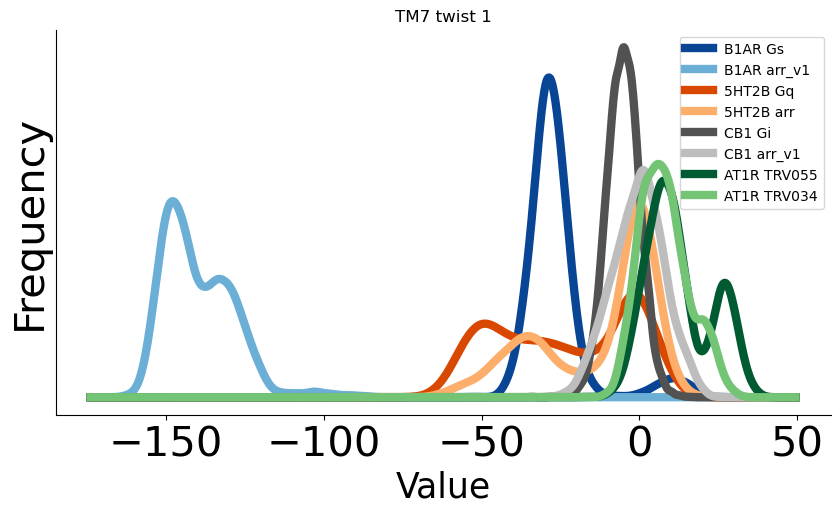

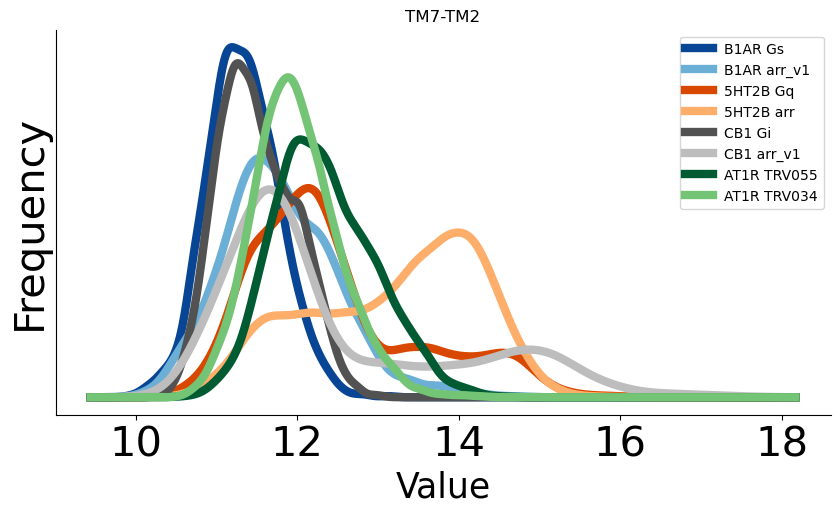

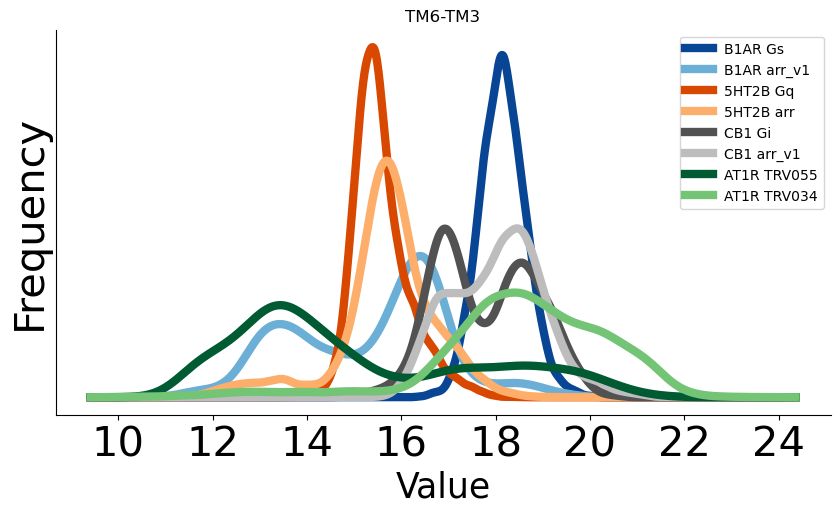

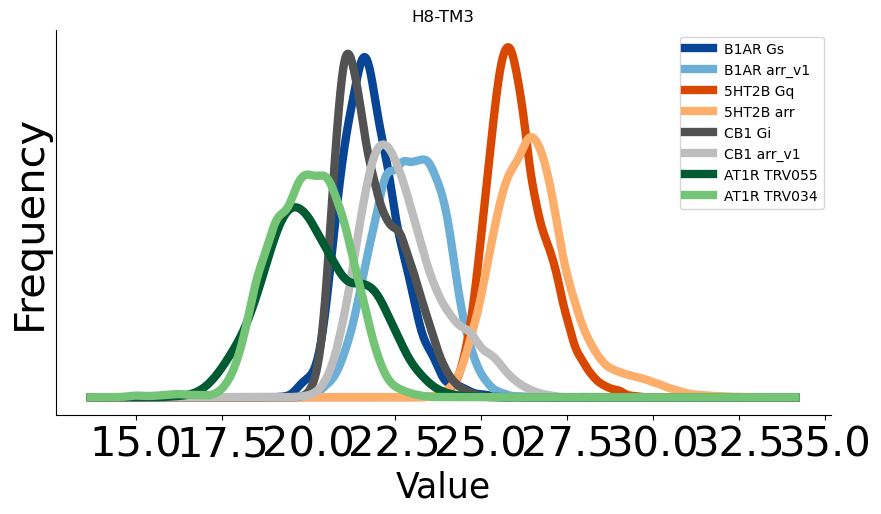

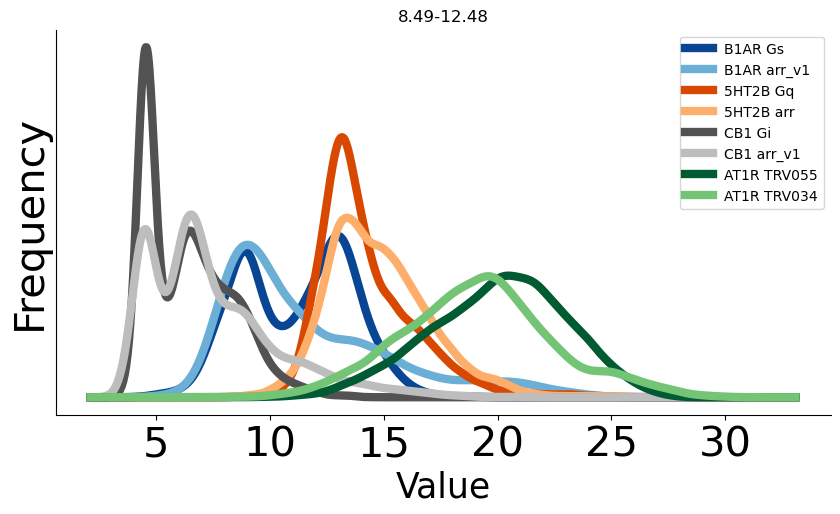

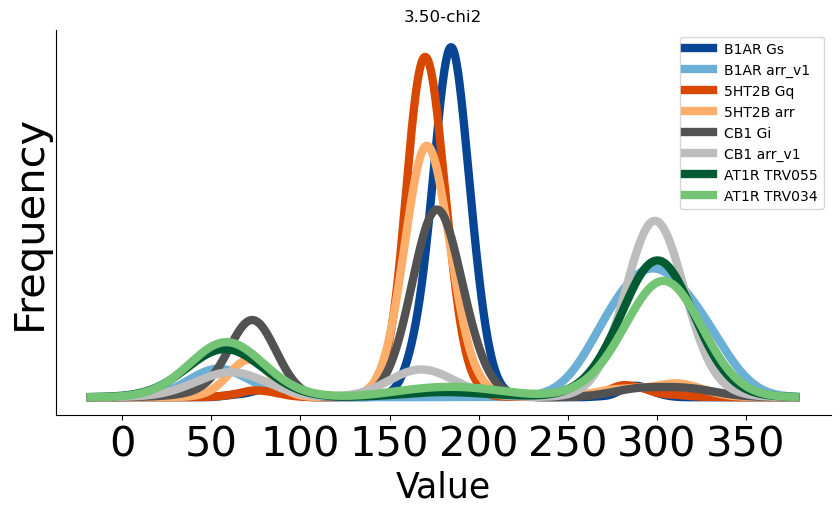

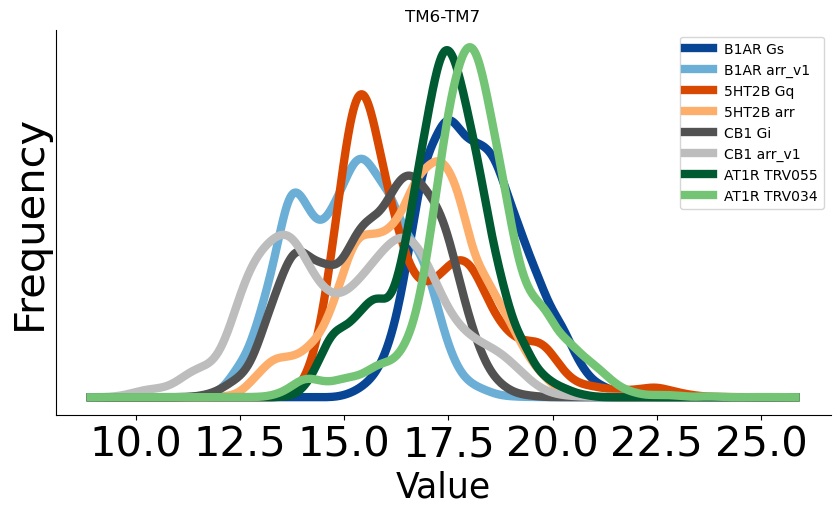

In [249]:
for metric in metrics:
    if filt_cond:
        metric = metric
    plot_measurements(measurements, metric, receps)

# stats #

In [40]:
metric_1 = '7.56N-7.52O'
metric_2 = '7.53-chi1'

for recep in receps:
    print(recep)
    tot_met_1 = []
    tot_met_2 = []
    
    for condition in conditions[recep]:
        tot_met_1 += measurements[recep][metric_1][condition]
        tot_met_2 += measurements[recep][metric_2][condition]


    print(compare_correlation(tot_met_1, tot_met_2))

B1AR
(-0.43320680632886194, 0.0)
5HT2B
(0.3561052771118577, 0.0)
CB1
(-0.14411980132643007, 2.4796510341262317e-95)
KOR
(0.1662759022971768, 1.1874631091115354e-193)


# residue numbering #

In [78]:
user_dict = {
        '7x53': 'protein and segid P388 and resid 380',
    '1x53': 'protein and segid P388 and resid 75',
    '7x56': 'protein and segid P388 and resid 383',
    '7x52': 'protein and segid P388 and resid 379',
    '8x49': 'protein and segid P388 and resid 388',
    'TM6': 'protein and segid P388 and resid 320 to 324',
    'TM3': 'protein and segid P388 and resid 149 to 153',
    'TM7': 'protein and segid P388 and resid 378 to 382',
    'TM2': 'protein and segid P388 and resid 92 to 96',
    'H8': 'protein and segid P388 and resid 390 to 394',
    '3x46': 'protein and segid P388 and resid 149',
    '3x50': 'protein and segid P388 and resid 153',
    '7x46': 'protein and segid P388 and resid 373',
    '7x47': 'protein and segid P388 and resid 374',
    '7x48': 'protein and segid P388 and resid 375',
    '7x49': 'protein and segid P388 and resid 376',
    '7x50': 'protein and segid P388 and resid 377'}


useful.create_conditions_dict(user_dict)


Enter the segid for the protein:  P0
Enter the residue number for 1.50:  77
Enter the residue number for 2.50:  105
Enter the residue number for 3.50:  156
Enter the residue number for 6.50:  289
Enter the residue number for 7.50:  327
Enter the residue number for 8.50:  335
Enter the GPCRDB range for TM6 (e.g., 3.44-3.56):  6.31-6.35
Enter the GPCRDB range for TM3 (e.g., 3.44-3.56):  3.46-3.50
Enter the GPCRDB range for TM7 (e.g., 3.44-3.56):  7.51-7.55
Enter the GPCRDB range for TM2 (e.g., 3.44-3.56):  2.42-2.46
Enter the GPCRDB range for TM8 (e.g., 3.44-3.56):  8.51-8.55



Generated dictionary:

generic = {
    '7x53': 'protein and segid P0 and resid 330',
    '1x53': 'protein and segid P0 and resid 80',
    '7x56': 'protein and segid P0 and resid 333',
    '7x52': 'protein and segid P0 and resid 329',
    '8x49': 'protein and segid P0 and resid 334',
    'TM6': 'protein and segid P0 and resid 270 to 274',
    'TM3': 'protein and segid P0 and resid 152 to 156',
    'TM7': 'protein and segid P0 and resid 328 to 332',
    'TM2': 'protein and segid P0 and resid 97 to 101',
    'H8': 'protein and segid P0 and resid 336 to 340',
    '3x46': 'protein and segid P0 and resid 152',
    '3x50': 'protein and segid P0 and resid 156',
    '7x46': 'protein and segid P0 and resid 323',
    '7x47': 'protein and segid P0 and resid 324',
    '7x48': 'protein and segid P0 and resid 325',
    '7x49': 'protein and segid P0 and resid 326',
    '7x50': 'protein and segid P0 and resid 327',
}


In [69]:
def print_chi1(resnum, last='CG'):
    print(f"""    '{resnum}-chi1': ['{{{resnum}}} and name N',
               '{{{resnum}}} and name CA',
               '{{{resnum}}} and name CB',
               '{{{resnum}}} and name {last}'],""")


def print_chi2(resnum, last='CD1'):
    print(f"""    '{resnum}-chi2': ['{{{resnum}}} and name CA',
               '{{{resnum}}} and name CB',
               '{{{resnum}}} and name CG',
               '{{{resnum}}} and name {last}'],""")
    

def write_diheds(resnums, chis):
    print('dihedrals = {')
    for i,resnum in enumerate(resnums):
        if chis[i] == 1:
            if 'I' in resnum:
                print_chi1(resnum, last='CG1')
            else:
                print_chi1(resnum)
        elif chis[i] == 2:
            if 'M' in resnum:
                print_chi2(resnum, last='SD')
            else:
                print_chi2(resnum)
    print('},')
    

In [75]:
# 5HT2B

resnums = ['W367', 'M108', 'Y370', 'F138', 'D100',
           'L132', 'W337', 'F341', 'I143', 'F333',
           'F330', 'F226']
           
chis = [1, 2, 1, 1, 1,
        1, 1, 1, 1, 1,
        1, 1]

write_diheds(resnums, chis)

segid = 'P388'

for resnum in resnums:
    print(f"    '{resnum}': 'protein and segid {segid} and resid {resnum[1:]}',")

dihedrals = {
    'W367-chi1': ['{W367} and name N',
               '{W367} and name CA',
               '{W367} and name CB',
               '{W367} and name CG'],
    'M108-chi2': ['{M108} and name CA',
               '{M108} and name CB',
               '{M108} and name CG',
               '{M108} and name SD'],
    'Y370-chi1': ['{Y370} and name N',
               '{Y370} and name CA',
               '{Y370} and name CB',
               '{Y370} and name CG'],
    'F138-chi1': ['{F138} and name N',
               '{F138} and name CA',
               '{F138} and name CB',
               '{F138} and name CG'],
    'D100-chi1': ['{D100} and name N',
               '{D100} and name CA',
               '{D100} and name CB',
               '{D100} and name CG'],
    'L132-chi1': ['{L132} and name N',
               '{L132} and name CA',
               '{L132} and name CB',
               '{L132} and name CG'],
    'W337-chi1': ['{W337} and name N',
               '{W337} and name CA',
   

In [81]:
# CB1

resnums = ['F174', 'L387', 'D163', 'L159', 'F155',
           'N389', 'F200', 'W356', 'W356', 'L287',
           'W279', 'W279']
           
chis = [1, 1, 1, 1, 1,
        1, 1, 1, 2, 1,
        1, 2]
        

write_diheds(resnums, chis)

segid = 'P6'

done = []
for resnum in resnums:
    if resnum not in done:
        print(f"    '{resnum}': 'protein and segid {segid} and resid {resnum[1:]}',")
        done.append(resnum)

dihedrals = {
    'F174-chi1': ['{F174} and name N',
               '{F174} and name CA',
               '{F174} and name CB',
               '{F174} and name CG'],
    'L387-chi1': ['{L387} and name N',
               '{L387} and name CA',
               '{L387} and name CB',
               '{L387} and name CG'],
    'D163-chi1': ['{D163} and name N',
               '{D163} and name CA',
               '{D163} and name CB',
               '{D163} and name CG'],
    'L159-chi1': ['{L159} and name N',
               '{L159} and name CA',
               '{L159} and name CB',
               '{L159} and name CG'],
    'F155-chi1': ['{F155} and name N',
               '{F155} and name CA',
               '{F155} and name CB',
               '{F155} and name CG'],
    'N389-chi1': ['{N389} and name N',
               '{N389} and name CA',
               '{N389} and name CB',
               '{N389} and name CG'],
    'F200-chi1': ['{F200} and name N',
               '{F200} and name CA',
    

In [ ]:
# KOR

resnums = ['F174', 'L387', 'D163', 'L159', 'F155',
           'N389', 'F200', 'W356', 'W356', 'L287',
           'W279', 'W279']
           
chis = [1, 1, 1, 1, 1,
        1, 1, 1, 2, 1,
        1, 2]
        

write_diheds(resnums, chis)

segid = 'P6'

done = []
for resnum in resnums:
    if resnum not in done:
        print(f"    '{resnum}': 'protein and segid {segid} and resid {resnum[1:]}',")
        done.append(resnum)